##Instalando dependencias 


In [ ]:
 !pip install 'fsspec>=0.3.3'

##Imports


In [ ]:
import dask.dataframe as dd
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive"

'Colab Notebooks'	 Obra					  'Voluta '
 Curriculo		'trabalho dicertativo de marketing.docx'   Wizard
 ImersaoDev_Alura	'Trem do estagio.gdoc'
'Iniciação Científica'	 UFOP


##Verificando dataset

In [ ]:
df = dd.read_csv('/content/drive/MyDrive/Colab Notebooks/IC/eccomerce/database/dataframes/olist_geoleocated_time_prediction.csv')

In [ ]:
df = df.compute()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112660 entries, 0 to 112659
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112660 non-null  int64  
 1   order_item_id                  112660 non-null  float64
 2   product_id                     112660 non-null  int64  
 3   seller_id                      112660 non-null  int64  
 4   shipping_limit_date            112660 non-null  object 
 5   price                          112660 non-null  float64
 6   freight_value                  112660 non-null  float64
 7   payment_sequential             112660 non-null  float64
 8   payment_type                   112660 non-null  int64  
 9   payment_installments           112660 non-null  float64
 10  payment_value                  112660 non-null  float64
 11  review_id                      112660 non-null  int64  
 12  review_score                  

In [ ]:
df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,costumer_lat,costumer_lng,seller_lat,seller_lng,days_to_delivery
0,0,1.0,8216,812,2017-09-19 09:45:35,58.9,13.29,1.0,1,2.0,72.19,55789,5.0,56,19620,2017-09-21 00:00:00,2017-09-22 10:57:03,22449,1,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,48076,28013,723,18,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-21.763186,-41.310265,-22.497188,-44.127324,6.0
1,7014,1.0,8216,812,2017-07-05 02:44:11,55.9,17.96,1.0,0,1.0,73.86,65104,5.0,56,29987,2017-07-14 00:00:00,2017-07-17 12:50:07,85025,1,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,5649,75800,1907,8,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-17.884803,-51.717167,-22.497188,-44.127324,6.0
2,30559,1.0,8216,812,2018-05-23 10:56:25,64.9,18.33,1.0,1,2.0,83.23,64310,4.0,4094,28560,2018-06-05 00:00:00,2018-06-06 21:41:12,28995,1,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,18589,30720,443,10,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-19.913964,-43.976106,-22.497188,-44.127324,5.0
3,40954,1.0,8216,812,2017-08-07 18:55:08,58.9,16.17,1.0,1,3.0,75.07,48121,5.0,56,192,2017-08-10 00:00:00,2017-08-13 03:35:17,17783,1,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,82561,83070,3470,17,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-25.520334,-49.124988,-22.497188,-44.127324,1.0
4,45875,1.0,8216,812,2017-08-16 22:05:11,58.9,13.29,1.0,1,4.0,72.19,24311,5.0,56,192,2017-08-25 00:00:00,2017-08-28 00:51:18,53457,1,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,4247,36400,1016,10,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-20.655379,-43.776331,-22.497188,-44.127324,1.0
5,58794,1.0,8216,812,2017-08-03 15:23:46,55.9,26.93,1.0,1,1.0,82.83,73293,5.0,56,192,2017-08-27 00:00:00,2017-08-27 12:30:09,26571,1,2017-07-27 15:11:51,2017-07-28 15:23:46,2017-08-02 18:32:34,2017-08-31 20:19:52,2017-08-24 00:00:00,18290,44560,1185,4,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-12.906138,-39.192076,-22.497188,-44.127324,5.0
6,69027,1.0,8216,812,2018-03-26 03:28:44,64.9,38.50,1.0,0,1.0,103.40,66246,5.0,56,13634,2018-03-29 00:00:00,2018-03-30 12:41:53,71997,1,2018-03-18 21:00:44,2018-03-20 03:28:44,2018-03-20 18:08:45,2018-03-28 21:57:44,2018-04-12 00:00:00,17734,45160,442,4,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-15.036469,-41.260324,-22.497188,-44.127324,0.0
7,74190,2.0,8216,812,2017-08-14 04:25:34,58.9,18.12,1.0,0,1.0,153.75,80659,5.0,56,192,2017-08-15 00:00:00,2017-08-24 19:35:04,3718,1,2017-08-05 16:59:05,2017-08-08 04:25:34,2017-08-10 16:40:11,2017-08-14 18:13:03,2017-09-06 00:00:00,47060,75903,3109,8,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-17.782743,-50.917956,-22.497188,-44.127324,2.0
8,74190,1.0,8359,812,2017-08-14 04:25:34,58.9,17.83,1.0,0,1.0,153.75,80659,5.0,56,192,2017-08-15 00:00:00,2017-08-24 19:35:04,3718,1,2017-08-05 16:59:05,2017-08-08 04:25:34,2017-08-10 16:40:11,2017-08-14 18:13:03,2017-09-06 00:00:00,47060,75903,3109,8,27277.0,582,21,26,54.0,599.0,6.0,530.0,30.0,9.0,14.0,-17.782743,-50.917956,-22.497188,-44.127324,2.0
9,82148,1.0,8216,812,2017-06-09 14:31:21,55.9,35.71,2

##Preparação dos dados


In [ ]:
encoder =  LabelEncoder()

In [ ]:
df["review_creation_date"] = encoder.fit_transform(df["review_creation_date"])
df["order_approved_at"] = encoder.fit_transform(df["order_approved_at"])
df["order_delivered_carrier_date"] = encoder.fit_transform(df["order_delivered_carrier_date"])
df["order_estimated_delivery_date"] = encoder.fit_transform(df["order_estimated_delivery_date"])
df["shipping_limit_date"] = encoder.fit_transform(df["shipping_limit_date"])
df["review_answer_timestamp"] = encoder.fit_transform(df["review_answer_timestamp"])
df["order_purchase_timestamp"] = encoder.fit_transform(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = encoder.fit_transform(df["order_delivered_customer_date"])

In [ ]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,costumer_lat,costumer_lng,seller_lat,seller_lng,days_to_delivery
0,0,1.0,8216,812,22606,58.9,13.29,1.0,1,2.0,72.19,55789,5.0,56,19620,284,22368,22449,1,23079,22564,21672,22509,188,48076,28013,723,18,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-21.763186,-41.310265,-22.497188,-44.127324,6.0
1,7014,1.0,8216,812,13182,55.9,17.96,1.0,0,1.0,73.86,65104,5.0,56,29987,216,13813,85025,1,13379,13135,12760,13731,142,5649,75800,1907,8,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-17.884803,-51.717167,-22.497188,-44.127324,6.0
2,30559,1.0,8216,812,69555,64.9,18.33,1.0,1,2.0,83.23,64310,4.0,4094,28560,538,73540,28995,1,73313,68432,66685,73147,354,18589,30720,443,10,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-19.913964,-43.976106,-22.497188,-44.127324,5.0
3,40954,1.0,8216,812,17142,58.9,16.17,1.0,1,3.0,75.07,48121,5.0,56,192,242,17164,17783,1,17537,17051,15904,17042,164,82561,83070,3470,17,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-25.520334,-49.124988,-22.497188,-44.127324,1.0
4,45875,1.0,8216,812,18388,58.9,13.29,1.0,1,4.0,72.19,24311,5.0,56,192,257,19090,53457,1,18771,18321,17079,18969,169,4247,36400,1016,10,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-20.655379,-43.776331,-22.497188,-44.127324,1.0


In [ ]:
df.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                           0
review_score                        0
review_comment_title                0
review_comment_message              0
review_creation_date                0
review_answer_timestamp             0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_cit

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_zip_code_pref

In [ ]:
df = df.astype(float)

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
colunas = ['Modelo','Fine-Tuning','MAE','MAPE'] 
Metrics = pd.DataFrame(columns = colunas)

In [ ]:
##separando as variaveis dependente e independente em dois data frames
X = df.drop(['days_to_delivery'], 1)
Y = df['days_to_delivery']

In [ ]:
# Splitting the dataset into 80% training data and 20% testing data.
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)
 

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(5, shuffle=True, random_state=150)

#Modelos


##Linear Regression

In [ ]:
model = LinearRegression()

my_pipeline = Pipeline(steps=[('m', model)])


#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

scores = cross_validate(my_pipeline, 
                        X, Y,
                        cv=kf,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'LinearRegression',
             'Fine-Tuning': 'Nao',
             'MAE'        : -1*np.mean(scores['test_mae']),
             'MAPE'       : -1*np.mean(scores['test_mape'])}

Metrics = Metrics.append(resultado,ignore_index=True)

In [ ]:
Metrics

,Modelo,Fine-Tuning,MAE,MAPE
0,LinearRegression,Nao,1.752619,1.308288e+15


##Polinomial linear regression


In [ ]:
#polynomial_features = PolynomialFeatures(degree=3)
#model = LinearRegression()


#my_pipeline = Pipeline(steps=[('polyFeature',polynomial_features),('m', model)])

#Define as metricas que quer utilizar.
#scoring = {'mae' :'neg_mean_absolute_error',
#           'mape': 'neg_mean_absolute_percentage_error'}

#scores = cross_validate(my_pipeline, 
#                        X, Y,
#                        cv=kf,
#                       scoring=scoring)

# Criar um dicionario com os resultados 
#resultado = {'Modelo'     : 'Polinomial linear Regression',
#             'MAE'        : -1*np.mean(scores['test_mae']),
#             'MAPE'       : -1*np.mean(scores['test_mape'])}

#Metrics = Metrics.append(resultado,ignore_index=True)

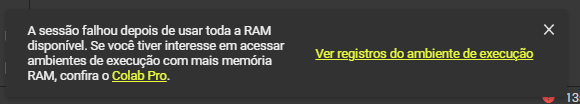

##Decision Tree


In [ ]:
model = DecisionTreeRegressor(random_state=150)

my_pipeline = Pipeline(steps=[('m', model)])

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

scores = cross_validate(my_pipeline, 
                        X, Y,
                        cv=kf,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'Decision Tree',
             'Fine-Tuning': 'Nao',
             'MAE'        : -1*np.mean(scores['test_mae']),
             'MAPE'       : -1*np.mean(scores['test_mape'])}

Metrics = Metrics.append(resultado,ignore_index=True)

In [ ]:
Metrics

,Modelo,Fine-Tuning,MAE,MAPE
0,LinearRegression,Nao,1.752619,1.308288e+15
1,Decision Tree,Nao,1.611900,1.032528e+15


##Random forest trees

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=0)

my_pipeline = Pipeline(steps=[('m', model)])

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

scores = cross_validate(my_pipeline, 
                        X, Y,
                        cv=kf,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'Random Forest',
             'Fine-Tuning': 'Nao',
             'MAE'        : -1*np.mean(scores['test_mae']),
             'MAPE'       : -1*np.mean(scores['test_mape'])}

Metrics = Metrics.append(resultado,ignore_index=True)

In [ ]:
Metrics

,Modelo,Fine-Tuning,MAE,MAPE
0,LinearRegression,Nao,1.752619,1.308288e+15
1,Decision Tree,Nao,1.611900,1.032528e+15
2,Random Forest,Nao,1.693346,1.483737e+15


##XGBoost

In [ ]:
model = xgb.XGBRegressor(silent = True)

my_pipeline = Pipeline(steps=[('m', model)])

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

scores = cross_validate(my_pipeline, 
                        X, Y,
                        cv=kf,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'XGB',
             'Fine-Tuning': 'Nao',
             'MAE'        : -1*np.mean(scores['test_mae']),
             'MAPE'       : -1*np.mean(scores['test_mape'])}

Metrics = Metrics.append(resultado,ignore_index=True)

In [ ]:
Metrics

,Modelo,Fine-Tuning,MAE,MAPE
0,LinearRegression,Nao,1.752619,1.308288e+15
1,Decision Tree,Nao,1.611900,1.032528e+15
2,Random Forest,Nao,1.693346,1.483737e+15
3,XGB,Nao,1.772936,1.562785e+15
